In [1]:
# In this notebook, we'll test out the functionality of the app. It's easier to test here than in the streamlit output

In [2]:
## Make widgets as the UI

In [3]:
import ipywidgets as widgets
import datetime

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
X = pd.read_csv('test_X.csv')
time = pd.read_csv('test_time.csv')
demand = pd.read_csv('test_demand.csv')
future_weather = pd.read_csv('test_future_weather.csv')


In [5]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               168 non-null    object 
 1   INTERVALSTARTTIME_GMT  168 non-null    object 
 2   INTERVALENDTIME_GMT    168 non-null    object 
 3   LOAD_TYPE              168 non-null    int64  
 4   OPR_DT                 168 non-null    object 
 5   OPR_HR                 168 non-null    int64  
 6   OPR_INTERVAL           168 non-null    int64  
 7   MARKET_RUN_ID          168 non-null    object 
 8   TAC_AREA_NAME          168 non-null    object 
 9   LABEL                  168 non-null    object 
 10  XML_DATA_ITEM          168 non-null    object 
 11  POS                    168 non-null    float64
 12  actual_demand_MW       168 non-null    float64
 13  EXECUTION_TYPE         168 non-null    object 
 14  GROUP                  168 non-null    int64  
 15  site  

In [6]:
X

,datetime,dow,hour,month,is_holiday,actual_demand_MW,temperature_degC,dewpoint_degC,relative_humidity_%,wind_speed_mph,site
0,2024-04-13 00:00:00-07:00,5,0,4,False,9598.82,12.22,-73.33,89,10,Caltech
1,2024-04-13 01:00:00-07:00,5,1,4,False,9598.82,12.22,-73.33,91,10,Caltech
2,2024-04-13 02:00:00-07:00,5,2,4,False,9165.42,12.22,-73.33,87,10,Caltech
3,2024-04-13 03:00:00-07:00,5,3,4,False,8815.08,12.22,-73.33,86,10,Caltech
4,2024-04-13 04:00:00-07:00,5,4,4,False,8602.39,12.22,-73.33,85,10,Caltech
...,...,...,...,...,...,...,...,...,...,...,...
140,2024-04-18 20:00:00-07:00,3,20,4,False,10974.11,18.89,-73.33,56,10,Caltech
141,2024-04-18 21:00:00-07:00,3,21,4,False,11136.39,17.22,-73.33,62,10,Caltech
142,2024-04-18 22:00:00-07:00,3,22,4,False,10891.39,16.11,-73.33,67,10,Caltech
143,2024-04-18 23:00:00-07:00,3,23,4,False,10300.23,15.56,-73.33,71,5,Caltech


In [7]:
demand

,datetime,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,actual_demand_MW,EXECUTION_TYPE,GROUP,site
0,2024-04-13 01:00:00-07:00,2024-04-13T07:00:00-00:00,2024-04-13T08:00:00-00:00,0,2024-04-13,1,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,9598.82,7DA,58,Caltech
1,2024-04-13 02:00:00-07:00,2024-04-13T08:00:00-00:00,2024-04-13T09:00:00-00:00,0,2024-04-13,2,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,9165.42,7DA,58,Caltech
2,2024-04-13 03:00:00-07:00,2024-04-13T09:00:00-00:00,2024-04-13T10:00:00-00:00,0,2024-04-13,3,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8815.08,7DA,58,Caltech
3,2024-04-13 04:00:00-07:00,2024-04-13T10:00:00-00:00,2024-04-13T11:00:00-00:00,0,2024-04-13,4,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8602.39,7DA,58,Caltech
4,2024-04-13 05:00:00-07:00,2024-04-13T11:00:00-00:00,2024-04-13T12:00:00-00:00,0,2024-04-13,5,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8579.17,7DA,58,Caltech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024-04-19 20:00:00-07:00,2024-04-20T02:00:00-00:00,2024-04-20T03:00:00-00:00,0,2024-04-19,20,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10697.15,7DA,365,Caltech
164,2024-04-19 21:00:00-07:00,2024-04-20T03:00:00-00:00,2024-04-20T04:00:00-00:00,0,2024-04-19,21,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10910.74,7DA,365,Caltech
165,2024-04-19 22:00:00-07:00,2024-04-20T04:00:00-00:00,2024-04-20T05:00:00-00:00,0,2024-04-19,22,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10754.85,7DA,365,Caltech
166,2024-04-19 23:00:00-07:00,2024-04-20T05:00:00-00:00,2024-04-20T06:00:00-00:00,0,2024-04-19,23,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10285.53,7DA,365,Caltech


In [8]:
demand[demand.actual_demand_MW == demand.actual_demand_MW.max()]

,datetime,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,actual_demand_MW,EXECUTION_TYPE,GROUP,site
92,2024-04-16 21:00:00-07:00,2024-04-17T03:00:00-00:00,2024-04-17T04:00:00-00:00,0,2024-04-16,21,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,11170.34,7DA,263,Caltech


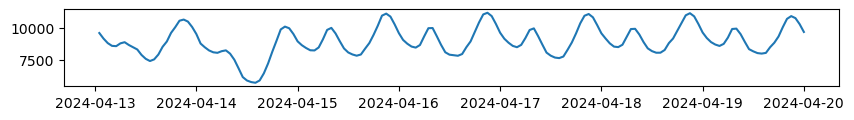

In [9]:
# demand[['datetime','actual_demand_MW']].plot()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
plt.plot(pd.to_datetime(demand['datetime']), demand['actual_demand_MW'])

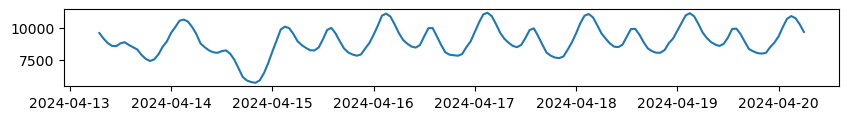

In [10]:
plt.figure(figsize=(10,1))
plt.plot(pd.to_datetime(demand['INTERVALSTARTTIME_GMT']), demand['actual_demand_MW'])

In [11]:
demand[demand['MARKET_RUN_ID'] == '7DA']

,datetime,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,actual_demand_MW,EXECUTION_TYPE,GROUP,site
0,2024-04-13 01:00:00-07:00,2024-04-13T07:00:00-00:00,2024-04-13T08:00:00-00:00,0,2024-04-13,1,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,9598.82,7DA,58,Caltech
1,2024-04-13 02:00:00-07:00,2024-04-13T08:00:00-00:00,2024-04-13T09:00:00-00:00,0,2024-04-13,2,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,9165.42,7DA,58,Caltech
2,2024-04-13 03:00:00-07:00,2024-04-13T09:00:00-00:00,2024-04-13T10:00:00-00:00,0,2024-04-13,3,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8815.08,7DA,58,Caltech
3,2024-04-13 04:00:00-07:00,2024-04-13T10:00:00-00:00,2024-04-13T11:00:00-00:00,0,2024-04-13,4,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8602.39,7DA,58,Caltech
4,2024-04-13 05:00:00-07:00,2024-04-13T11:00:00-00:00,2024-04-13T12:00:00-00:00,0,2024-04-13,5,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,8579.17,7DA,58,Caltech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024-04-19 20:00:00-07:00,2024-04-20T02:00:00-00:00,2024-04-20T03:00:00-00:00,0,2024-04-19,20,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10697.15,7DA,365,Caltech
164,2024-04-19 21:00:00-07:00,2024-04-20T03:00:00-00:00,2024-04-20T04:00:00-00:00,0,2024-04-19,21,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10910.74,7DA,365,Caltech
165,2024-04-19 22:00:00-07:00,2024-04-20T04:00:00-00:00,2024-04-20T05:00:00-00:00,0,2024-04-19,22,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10754.85,7DA,365,Caltech
166,2024-04-19 23:00:00-07:00,2024-04-20T05:00:00-00:00,2024-04-20T06:00:00-00:00,0,2024-04-19,23,0,7DA,SCE-TAC,Demand Forecast 7-Day Ahead,SYS_FCST_7DA_MW,0.2,10285.53,7DA,365,Caltech


In [12]:
# ?pd.DataFrame.to_csv
future_weather[['index','site']]

,index,site
0,2024-04-13 00:00:00+00:00,Caltech
1,2024-04-13 01:00:00+00:00,Caltech
2,2024-04-13 02:00:00+00:00,Caltech
3,2024-04-13 03:00:00+00:00,Caltech
4,2024-04-13 04:00:00+00:00,Caltech
...,...,...
157,2024-04-19 13:00:00+00:00,Caltech
158,2024-04-19 14:00:00+00:00,Caltech
159,2024-04-19 15:00:00+00:00,Caltech
160,2024-04-19 16:00:00+00:00,Caltech


In [14]:
import pickle
model_final = pickle.load(open('../models/model_04_10.pkl', 'rb'))
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['actual_demand_MW',
                                                   'temperature_degC',
                                                   'dewpoint_degC',
                                                   'relative_humidity_%',
                                                   'wind_speed_mph']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['dow', 'hour', 'month',
                                                   'is_holiday', 'site'])])),
                ('xgb',
                 XGBRegressor(base_score=None, boo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [15]:
model_final.predict(X)

array([0.9305377 , 0.66713405, 0.80996114, 0.92322904, 0.9449384 ,
       0.9082969 , 0.9171332 , 0.93983555, 0.9385804 , 0.9512027 ,
       0.9112943 , 0.95910776, 1.0001487 , 0.9896965 , 0.9765002 ,
       0.96258944, 0.9367928 , 0.91546327, 0.9444972 , 0.80977   ,
       0.90723675, 0.9753568 , 0.9394427 , 1.0033497 , 0.9762212 ,
       0.9441325 , 0.97607625, 0.9750653 , 0.94597834, 0.94561666,
       0.97483885, 0.9803761 , 0.9640451 , 0.9830889 , 0.964399  ,
       0.93463165, 0.94820297, 0.9595819 , 0.91082937, 0.9366083 ,
       0.94209903, 0.9525795 , 0.8886026 , 0.86402094, 0.9943671 ,
       0.9859094 , 1.008397  , 1.0554475 , 0.9167899 , 0.9491698 ,
       0.9168849 , 0.9322155 , 0.96623677, 0.9446029 , 0.9374562 ,
       0.9596223 , 0.95237476, 0.99734557, 0.9478999 , 0.9789429 ,
       1.0182415 , 1.057824  , 0.96835303, 0.9133319 , 0.79131866,
       0.783049  , 0.7351055 , 0.6621959 , 0.7570234 , 0.82941264,
       0.7388491 , 0.666334  , 0.884748  , 0.7849772 , 0.85277

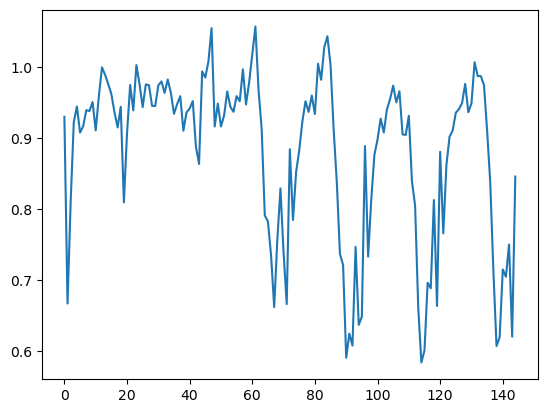

In [16]:
pred = model_final.predict(X)
plt.plot(range(len(pred)), pred)

In [17]:
X

,datetime,dow,hour,month,is_holiday,actual_demand_MW,temperature_degC,dewpoint_degC,relative_humidity_%,wind_speed_mph,site
0,2024-04-13 00:00:00-07:00,5,0,4,False,9598.82,12.22,-73.33,89,10,Caltech
1,2024-04-13 01:00:00-07:00,5,1,4,False,9598.82,12.22,-73.33,91,10,Caltech
2,2024-04-13 02:00:00-07:00,5,2,4,False,9165.42,12.22,-73.33,87,10,Caltech
3,2024-04-13 03:00:00-07:00,5,3,4,False,8815.08,12.22,-73.33,86,10,Caltech
4,2024-04-13 04:00:00-07:00,5,4,4,False,8602.39,12.22,-73.33,85,10,Caltech
...,...,...,...,...,...,...,...,...,...,...,...
140,2024-04-18 20:00:00-07:00,3,20,4,False,10974.11,18.89,-73.33,56,10,Caltech
141,2024-04-18 21:00:00-07:00,3,21,4,False,11136.39,17.22,-73.33,62,10,Caltech
142,2024-04-18 22:00:00-07:00,3,22,4,False,10891.39,16.11,-73.33,67,10,Caltech
143,2024-04-18 23:00:00-07:00,3,23,4,False,10300.23,15.56,-73.33,71,5,Caltech


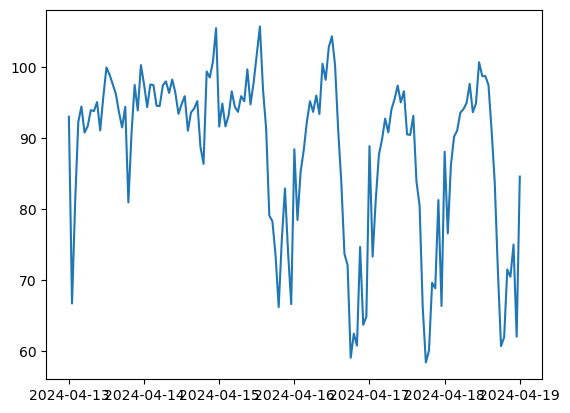

In [18]:
prediction = pd.Series(model_final.predict(X) * 100, index=pd.to_datetime(X['datetime']), name='% available')
plt.plot(prediction)

In [68]:
test_recommendation = pd.read_csv('test_recommendation.csv')
test_recommendation

,Unnamed: 0,datetime,dow,hour,month,is_holiday,actual_demand_MW,temperature_degC,dewpoint_degC,relative_humidity_%,wind_speed_mph,site,% available
0,0,2024-04-14 00:00:00-07:00,6,0,4,False,8782.10,NaN,NaN,NaN,NaN,Caltech,99.582550
1,1,2024-04-14 01:00:00-07:00,6,1,4,False,8782.10,NaN,NaN,NaN,NaN,Caltech,99.047455
2,2,2024-04-14 02:00:00-07:00,6,2,4,False,8492.48,NaN,NaN,NaN,NaN,Caltech,100.000000
3,3,2024-04-14 03:00:00-07:00,6,3,4,False,8248.19,NaN,NaN,NaN,NaN,Caltech,100.000000
4,4,2024-04-14 04:00:00-07:00,6,4,4,False,8103.06,NaN,NaN,NaN,NaN,Caltech,100.000000
5,5,2024-04-14 05:00:00-07:00,6,5,4,False,8061.29,NaN,NaN,NaN,NaN,Caltech,95.513020
6,6,2024-04-14 06:00:00-07:00,6,6,4,False,8188.87,NaN,NaN,NaN,NaN,Caltech,93.767914
7,7,2024-04-14 07:00:00-07:00,6,7,4,False,8252.72,6.67,1.67,70.0,5.0,Caltech,96.821400
8,8,2024-04-14 08:00:00-07:00,6,8,4,False,7995.21,8.89,2.22,63.0,5.0,Caltech,96.098210
9,9,2024-04-14 09:00:00-07:00,6,9,4,False,7527.25,12.22,4.44,60.0,5.0,Caltech,94.888176


In [70]:
recommendation = test_recommendation.copy().reset_index()
# print(recommendation)
if len(recommendation) == 1:
    print('only 1')
    #return recommendation
recommendation['time_delta'] = pd.to_datetime(recommendation['datetime']).diff()
recommendation.loc[0, 'start'] = 1
for i in range(len(recommendation)-1):
    if recommendation['time_delta'].iloc[i+1] != pd.Timedelta('1h'):
        recommendation.loc[i, 'end'] = 1
        recommendation.loc[i+1, 'start'] = 1
    else:
        recommendation.loc[i, 'end'] = 0
        recommendation.loc[i+1, 'start'] = 0
recommendation.loc[len(recommendation)-1, 'end'] = 1
small_recommendation = recommendation.loc[(recommendation['start'] == 1) | (recommendation['end'] == 1), :]

recommendation_start_end = []
for i in list(small_recommendation.index):
    print(i, list(small_recommendation.index))
    if (small_recommendation.loc[i, 'start'] == 1) & (small_recommendation.loc[i, 'end'] == 1):
        recommendation_start_end.append((small_recommendation.loc[i, 'datetime'], small_recommendation.loc[i, 'datetime'] + pd.Timedelta('1h')))
    elif small_recommendation.loc[i, 'start'] == 1:
        start = small_recommendation.loc[i, 'datetime']
        print(small_recommendation.loc[:, ['start','end']])
        for j in list(small_recommendation.index):
            if small_recommendation.loc[j, 'end']==1:
                end = small_recommendation.loc[j, 'datetime']
                recommendation_start_end.append((start, end))
final_list = []
for i in recommendation_start_end:
    if i not in final_list:
        final_list.append(i)


0 [0, 23]
    start  end
0     1.0  0.0
23    0.0  1.0
23 [0, 23]


In [71]:
final_list

[('2024-04-14 00:00:00-07:00', '2024-04-14 23:00:00-07:00')]

In [56]:
small_recommendation.loc[:, :]
[i for i in list(small_recommendation.index)]
small_recommendation.loc[23,'end'] == 1

True

In [ ]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    description='Loading:',
    bar_style='info',
    style={'bar_color': '#ffff00'},
    orientation='horizontal'
)
widgets.Dropdown(
    options=[('Caltech','Caltech'), ('JPL','JPL'), ('Office001','Office001')],
    value='Caltech',
    description='Site:',
)

widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

button = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button

widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

In [ ]:
today = datetime.today().date()

In [ ]:
# with selection
site = 'Caltech'
user_preferences = 'No Preference'

start_date = today
end_date = today + pd.Timedelta('1d')

# This is what the app does:
1. create the UI
2. makes graphs
3. get weather data (date and location)
4. get caiso data (date and location)
5. get the date range
6. get the location
7. makes X variable
8. loads model
9. performs inference
10. graphs results

In [ ]:
from src.weather import get_processed_hourly_7day_weather

In [ ]:
site2latlon = {'Caltech':(34.134785646454844, -118.11691382579643),
               'Office001':(37.33680466796926, -121.90743423142634),
               'JPL':(34.20142342818471, -118.17126565774107)}

In [ ]:
cal_weather = get_processed_hourly_7day_weather(*site2latlon[site])

In [ ]:
cal_weather.columns